<a href="https://colab.research.google.com/github/pravincoder/Machine-Learning-Models-Tutorial/blob/main/Convolution%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolution Neural Network

A Convolutional Neural Network (CNN) processes image data by learning visual patterns, such as edges, textures, and shapes, to classify or interpret images. Let’s break down the working of a CNN using the Fashion MNIST dataset as an example.

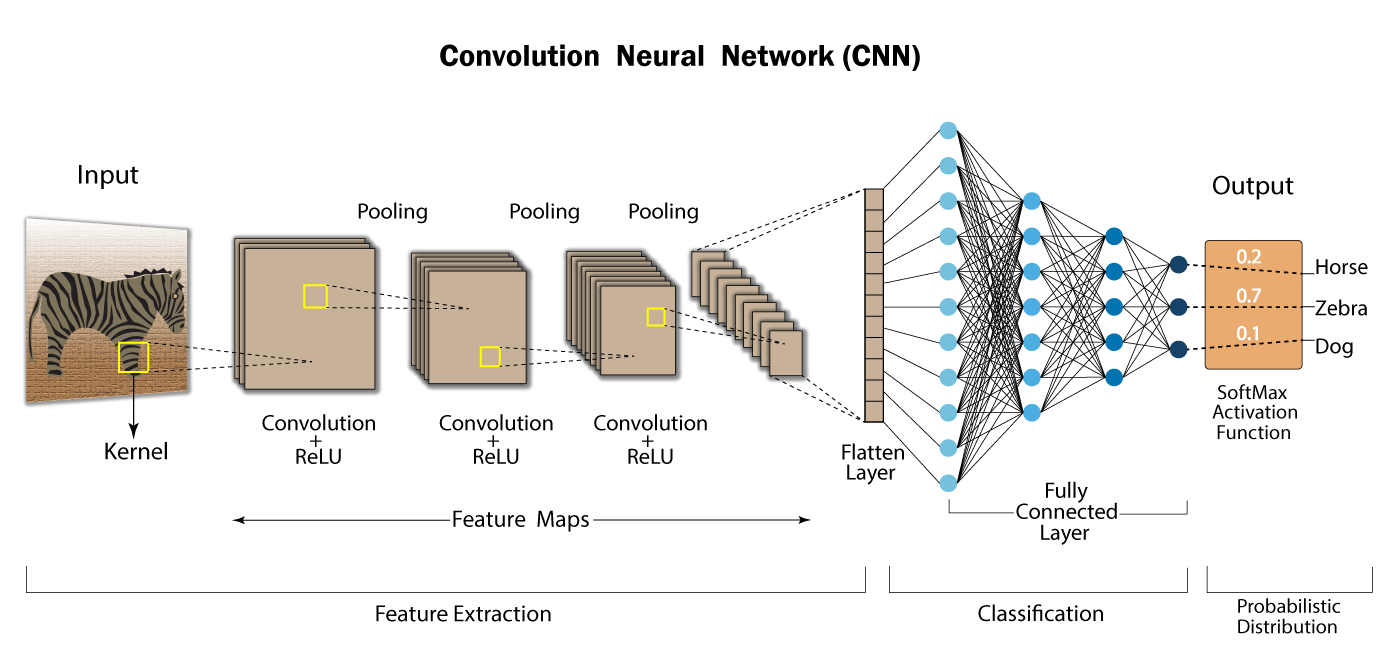

### What is Fashion MNIST?
Dataset: It contains grayscale images of 10 clothing categories like T-shirts, trousers, and shoes.
Image Size: Each image is 28x28 pixels (small and simple).
Goal: Classify each image into one of the 10 categories.


# Working with a larger example (multiclass classification)


### **Problem**:- Fashion/Dress Classification problem

when we have more than 2 classes as an option , its know as **Multi-Class Classification**.

#### In this problem we have to classify different images of clothing by building a neural network using multi-class classification.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 1s 27us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
#Check the first training example
print(f"Training Sample:\n{train_data[0]}\n train Label:\n {train_labels[0]}" )
print(f"Test Sample: \n {test_data[0]}\n test Label: \n {test_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

## Labels name and Number of each label
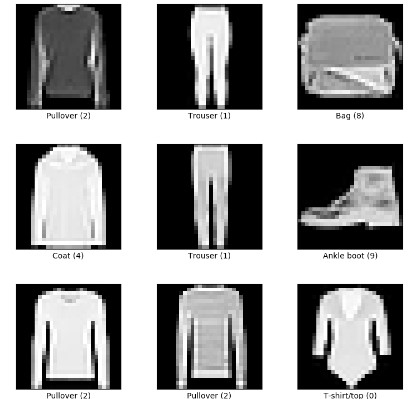

In [3]:
# Get shape of data
train_data[0].shape,test_data[0].shape

((28, 28), (28, 28))

## How a CNN Works (Step-by-Step)
1. Input Layer:

Each image is represented as a grid of pixel values.
For Fashion MNIST, the input is a 28x28 grid with pixel values ranging from 0 (black) to 255 (white).
2. Convolution Operation:

A small filter (or kernel), such as 3x3 or 5x5, slides over the image.
Each filter extracts features like edges or corners by multiplying its values with the pixel values and summing them up.
Example: A filter may detect vertical edges, while another detects horizontal lines.
This operation generates a feature map—a smaller representation of the image that highlights certain features.
3. Activation Function (ReLU):

After convolution, a non-linear function like ReLU (Rectified Linear Unit) is applied.
ReLU replaces negative values in the feature map with 0, making it easier for the network to learn complex patterns.
Why? Non-linearity helps the network capture intricate relationships.
4. Pooling (Downsampling):

Pooling reduces the size of the feature map while retaining the most important information.
The most common pooling method is Max Pooling, which picks the maximum value in a small region (e.g., 2x2) of the feature map.
Why? Reduces computation and prevents overfitting by simplifying the representation.
5. Multiple Convolutional Layers:

The process of convolution, activation, and pooling is repeated multiple times.
As we go deeper, the filters capture more complex features:
Early layers detect edges and textures.
Later layers identify shapes and patterns specific to clothing items (like collars or laces).
6. Flattening:

After the convolutional and pooling layers, the feature maps are flattened into a 1D vector.
This vector represents the extracted features of the image and is used as input for the next step.
7. Fully Connected Layers (Dense Layers):

The flattened vector is passed through one or more dense layers.
Each dense layer learns to combine the features and make predictions.
Example: Combining "long straight edge" and "round shape" features may indicate "trousers."
8. Output Layer:

The final dense layer outputs probabilities for each class (e.g., T-shirt, shoe, etc.).
For Fashion MNIST, the output layer has 10 neurons (one for each category).
Softmax Activation: Converts raw scores into probabilities for each class.


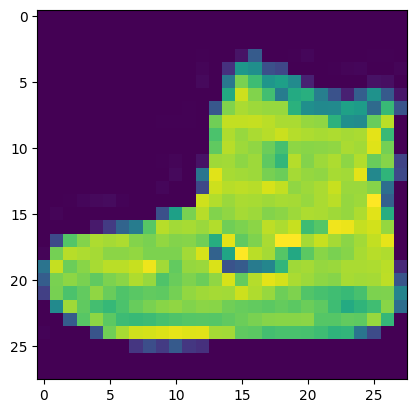

In [4]:
# Plot a sample
plt.imshow(train_data[0]);


In [5]:
# Check Sample label
(train_labels.shape,test_labels.shape)

((60000,), (10000,))

In [6]:
# Get the labels human read able name of each number label
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneker","Bag","Ankle Boot"]
len(label_names)

10

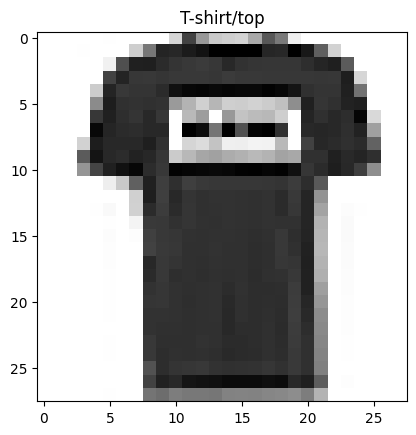

In [7]:
def label_info(index_choice):
  plt.imshow(train_data[index_choice],cmap=plt.cm.binary)
  plt.title(label_names[train_labels[index_choice]])

index_choice = 1
label_info(index_choice)

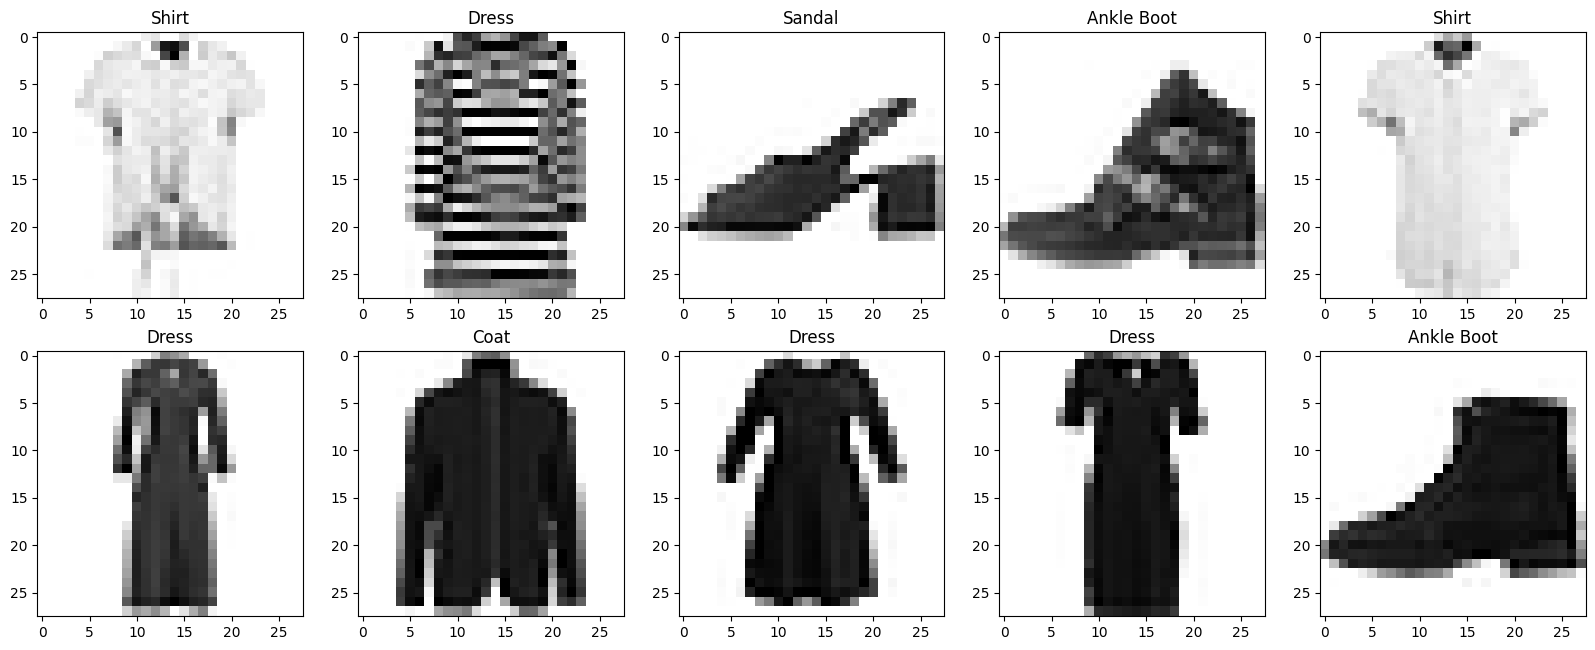

In [8]:
# lets plot multiple random images of fashion mnist
import random
plt.figure(figsize=(20,20))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  label_info(rand_index)

# Building a Multi-Class Classifattion Model

#### for our multi-class classification , we can first try the simalar archictecture to our binary classifier :

* Input Shape= 28X28 (Shape of one img)
* Output Shape = 10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  * If *labels are one_hot encoded*, use CategoricalCrossentropy()
  * If *labels are integer form* , use SparseCategoricalCrossentropy()
* Output Layer Activation = Softmax (Not Sigmoid)

In [9]:
# Flatten Layer
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [10]:
28*28

784

In [11]:
# Random Seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    # our data need to be flatten
    layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    layers.Dense(10,activation="relu"),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation="relu"),
    layers.Dense(10,activation='softmax')
])
# Compile
model.compile(optimizer='Adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

# Fit
hist = model.fit(train_data,
                            tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1264 - loss: 3.1467 - val_accuracy: 0.2155 - val_loss: 1.8793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2285 - loss: 1.8207 - val_accuracy: 0.2579 - val_loss: 1.7086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2566 - loss: 1.7134 - val_accuracy: 0.2908 - val_loss: 1.6511
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3121 - loss: 1.6113 - val_accuracy: 0.4230 - val_loss: 1.3394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4376 - loss: 1.3091 - val_accuracy: 0.4528 - val_loss: 1.2528
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4513 - loss: 1.2697 - val_accuracy: 0.4543 - val_loss: 1.2451
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4558 - loss: 1.2578 - val_accuracy: 0.4552 - val_loss: 1.2393
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4566 - loss: 1.2541 

In [12]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FLatten_layer (Flatten)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,172 (98.33 KB)

 Trainable params: 8,390 (32.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,782 (65.56 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4406 - loss: 1.2667
Test accuracy: 0.45


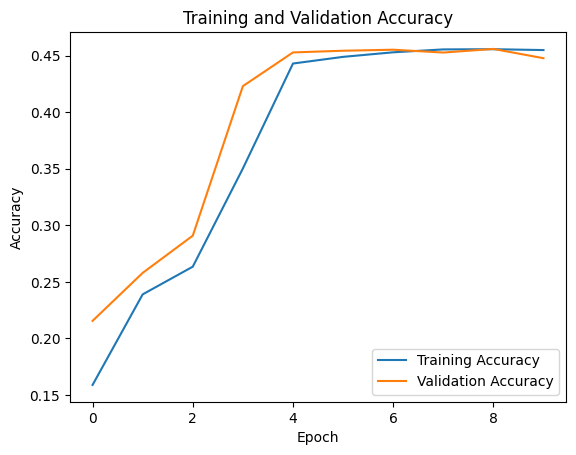

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, tf.one_hot(test_labels,depth=10))
print(f"Test accuracy: {test_acc:.2f}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### Normalization
##### Neural network prefer data to be in scaled (NORMALIZED) , this means the generally have number in the from of tensor's between 0 & 1.

In [14]:
# Check the min and max value of training data
train_data.min(),train_data.max()

(0, 255)

In [15]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data = train_data/255.0
test_data = test_data/255.0
train_data.shape

(60000, 28, 28)

In [16]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

# Create the convolutional model
conv_model = tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name="Conv_Layer_1"),
    tf.keras.layers.MaxPooling2D((2, 2), name="MaxPool_1"),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name="Conv_Layer_2"),
    tf.keras.layers.MaxPooling2D((2, 2), name="MaxPool_2"),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name="Conv_Layer_3"),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(name="Flatten_Layer"),
    tf.keras.layers.Dense(128, activation='relu', name="Dense_Layer_1"),
    tf.keras.layers.Dense(10, activation='softmax', name="Output_Layer")
])

# Compile the model
conv_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Model summary
conv_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_Layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_1 (MaxPooling2D)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_Layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_2 (MaxPooling2D)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_Layer_3 (Conv2D)                │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_1 (Dense)                │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fit the model
conv_history = conv_model.fit(train_data[..., tf.newaxis],  # Add channel dimension
                              train_labels,
                              epochs=1,
                              validation_data=(test_data[..., tf.newaxis], test_labels))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 0.7505 - loss: 0.6690 - val_accuracy: 0.8785 - val_loss: 0.3448


**NOTE**- Neural network tend to prefer data in numerical form as well as scaled/normalized (numbers b/w 0 & 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8808 - loss: 0.3464
Test accuracy: 0.88


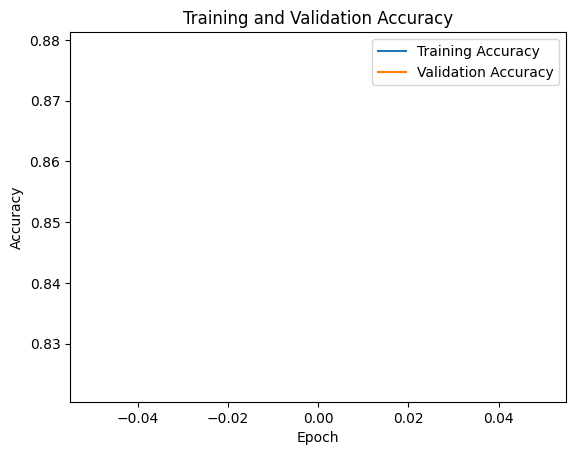

In [18]:
# Evaluate the model
test_loss, test_acc = conv_model.evaluate(test_data[..., tf.newaxis], test_labels)
print(f"Test accuracy: {test_acc:.2f}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(conv_history.history['accuracy'], label='Training Accuracy')
plt.plot(conv_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [22]:
# Save the trained model
conv_model.save("fashion_mnist.h5")

In [24]:
# Load the trained model
model = models.load_model("fashion_mnist.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpskfdtdgl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135452848817248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452740853376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816247616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816251664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816259232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816363360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816367936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816368816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816373392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135452816374096: TensorSpec(shape=(), dtype=tf.resource, name=None)
